<center><h1 style="color: gray">Spaceship Titanic</h1></center>

<center><strong><h1 style="color: navy">By: Ahmed Zaki Elbeltagy</h1></strong></center>
<center><strong><h1 style="color: navy">ID: 202002986</h1></strong></center>

<img src=https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg width="600">

### Table of Contents
<ul>
<li><a href="#problem">1. Problem overview</a></li>
<li><a href="#lib">2. importing needed libraries</a></li>
<li><a href="#explore">3. Exploring the dataset</a></li>
<li><a href="#preprocess">4. Pre-Processing</a></li>
<li><a href="#eda">5. EDA</a></li>
<li><a href="#model">6. Modeling</a></li>
<li><a href="#hyper">7. HyperParameters Tuning</a>
<li><a href="#res">8. Results</a>
</ul>

<a id='problem'></a>

# <em style="color:teal">Problem Overview</em>

#### The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the 

#### vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

#### While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided 

#### with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though 

#### the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



# <em style="color:teal">Dataset Description</em>

### PassengerId

#### A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with 

#### and pp is their number within the group. People in a group are often family members, but not always.

# ------------------------------------------------------------------------------------------------------------

### HomePlanet
#### The planet the passenger departed from, typically their planet of permanent residence.

# ------------------------------------------------------------------------------------------------------------

### CryoSleep

#### Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in 

#### cryosleep are confined to their cabins.

# ------------------------------------------------------------------------------------------------------------

### Cabin

#### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for 

#### Starboard.

# ------------------------------------------------------------------------------------------------------------

### Destination

#### The planet the passenger will be debarking to.

# ------------------------------------------------------------------------------------------------------------

### Age

#### he age of the passenger.

# ------------------------------------------------------------------------------------------------------------

### VIP

#### Whether the passenger has paid for special VIP service during the voyage.

# ------------------------------------------------------------------------------------------------------------

### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

#### Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

# ------------------------------------------------------------------------------------------------------------

### Name

#### The first and last names of the passenger.

# ------------------------------------------------------------------------------------------------------------

### Transported

#### Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# ------------------------------------------------------------------------------------------------------------

## <strong><em style="color:purple"> Our Target</em></strong>

### predict which passengers were transported by the anomaly using records recovered from the spaceship’s 

### damaged computer system. So I am going to help save them and change history! 😂😂😂😂

### 🤔We can see that it is very exciting and interesting and serious problem that we need to solve🤔

<a id='lib'></a>

<center><strong><h1 style="color:navy">Importing Libraries</h1></strong></center>

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from numpy import mean
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\Anaconda3\lib\site-packages\pandas\_testing.py:24: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  import pandas._libs.testing as _testing


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<center><strong><h1 style="color:navy">Reading Dataset</h1></strong></center>

In [2]:
dataset = pd.read_csv("D://FILMS//spaceship-titanic//train.csv")
dataset.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# ------------------------------------------------------------------------------------------------------------

<a id='explore'></a>

<center><strong><h1 style="color:navy">Exploring the Data</h1></strong></center>

### Getting general info about the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# ------------------------------------------------------------------------------------------------------------

## Check to see if there are any null values.

In [4]:
dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### As we can see, the majority of the features have a significant number of null values.

# -----------------------------------------------------------------------------------------------

# Description for the numerical data

In [5]:
dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# ------------------------------------------------------------------------------------------------------------

<a id='preprocess'></a>

<center><strong><h1 style="color:navy">Pre-Processing</h1></strong></center>

### Droping unnecessary features

In [6]:
dataset = dataset.drop(columns=['Name'])

# I will drop PassengerId feature for now
dataset = dataset.drop(columns=['PassengerId'])

In [7]:
dataset

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


# -----------------------------------------------------------------------------------------------------------

### Handling NULL Values (Categorical Features)

In [8]:
# Handling Destination Feature (fill NULL with mode)
dataset['Destination'] = dataset['Destination'].fillna(dataset['Destination'].mode()[0])

# Handling Home Palnet (fill NULL with the mode)
dataset['HomePlanet'] = dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0])

# Handling Cryo Sleep, VIP (fill NULL with mode)
dataset['CryoSleep'] = dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0])
dataset['VIP'] = dataset['VIP'].fillna(dataset['VIP'].mode()[0])

# Handling Cabin
dataset['Cabin'] = dataset['Cabin'].fillna(value="Missing")

### Handling VIP, Cryo Sleep and Transported(label) => converting them from being of type "object" to be of type 

### "float".

In [9]:
dataset["VIP"] = dataset["VIP"].astype(int)
dataset["Transported"] = dataset["Transported"].astype(int)
dataset["CryoSleep"] = dataset["CryoSleep"].astype(int)

### Handling Cabin Feature

In [10]:
#New Deck and Side feature
dataset['Deck'] = ""
dataset['Side'] = ""
for rowNum in range(dataset.shape[0]):
    if dataset['Cabin'][rowNum] == "Missing":
        dataset['Deck'][rowNum] = "Missing"
        dataset['Side'][rowNum] = "Missing"
    else:
        dataset['Deck'][rowNum] = dataset['Cabin'][rowNum][0]
        dataset['Side'][rowNum] = dataset['Cabin'][rowNum].split("/")[2]
        
#Drop Cabin feature
dataset = dataset.drop(columns=['Cabin'],axis=1)
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S


# ------------------------------------------------------------------------------------------------------------

### Handling NULL Values (Numerical Features)

In [11]:
# Hndling RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck
dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] \
    = dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

# Handling age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [12]:
# Converting float features to int ones
dataset["RoomService"] = dataset["RoomService"].astype(int)
dataset["FoodCourt"] = dataset["FoodCourt"].astype(int)
dataset["ShoppingMall"] = dataset["ShoppingMall"].astype(int)
dataset["Spa"] = dataset["Spa"].astype(int)
dataset["VRDeck"] = dataset["VRDeck"].astype(int)

# ----------------------------------------------------------------------------------------------------------

## Checking Null Values

In [13]:
dataset.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

### Our dataset now doesn't have any NULL values as we can see.

# ------------------------------------------------------------------------------------------------------------

## Using label encoder to convert "HomePlanet," "Destination," "Deck," and "Side" to numerical features.

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['HomePlanet'] = labelencoder.fit_transform(dataset['HomePlanet'])
dataset['Destination'] = labelencoder.fit_transform(dataset['Destination'])
dataset['Deck'] = labelencoder.fit_transform(dataset['Deck'])
dataset['Side'] = labelencoder.fit_transform(dataset['Side'])

## Re-order the columns

In [15]:
new_cols_order = ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
dataset=dataset.reindex(columns=new_cols_order)

In [16]:
dataset

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,0,1,1,0,0,0,0,0,0
1,0,0,2,0,5,2,109,9,25,549,44,1
2,1,0,2,1,0,2,43,3576,0,6715,49,0
3,1,0,2,0,0,2,0,1283,371,3329,193,0
4,0,0,2,0,5,2,303,70,151,565,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,1,0,1,0,6819,0,1643,74,0
8689,0,1,1,0,6,2,0,0,0,0,0,0
8690,0,0,2,0,6,2,0,0,1872,1,0,1
8691,1,0,0,0,4,2,0,1049,0,353,3235,0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int32
 1   CryoSleep     8693 non-null   int32
 2   Destination   8693 non-null   int32
 3   VIP           8693 non-null   int32
 4   Deck          8693 non-null   int32
 5   Side          8693 non-null   int32
 6   RoomService   8693 non-null   int32
 7   FoodCourt     8693 non-null   int32
 8   ShoppingMall  8693 non-null   int32
 9   Spa           8693 non-null   int32
 10  VRDeck        8693 non-null   int32
 11  Transported   8693 non-null   int32
dtypes: int32(12)
memory usage: 407.6 KB


# ----------------------------------------------------------------------------------------------------------

<a id='eda'></a>

<center><strong><h1 style="color:navy">EDA</h1></strong></center>

## Checking if the data is balanced or not.

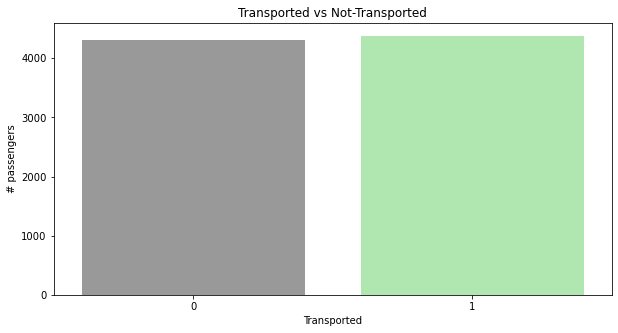

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(dataset['Transported'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Transported vs Not-Transported')
plt.ylabel('# passengers')
plt.show()

### The bar-plot above demonstrates that our dataset is balanced.

# ----------------------------------------------------------------------------------------------------

## Heat map that shows the correlations between features.

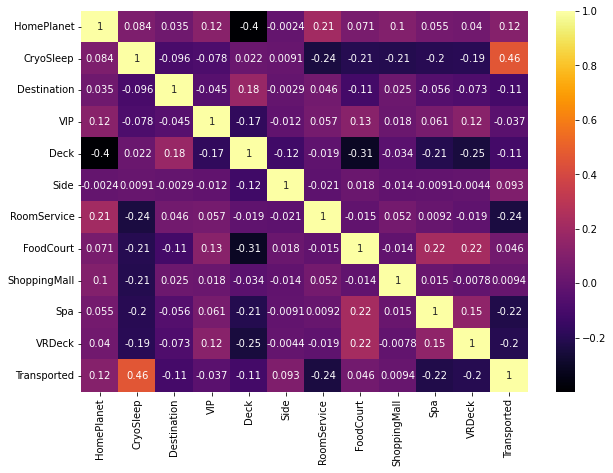

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True, cmap='inferno');

In [20]:
dataset.corr()["Transported"].abs().sort_values(ascending=False)[1:]

CryoSleep       0.460132
RoomService     0.241124
Spa             0.218545
VRDeck          0.204874
HomePlanet      0.115461
Deck            0.112417
Destination     0.108152
Side            0.093497
FoodCourt       0.045583
VIP             0.037261
ShoppingMall    0.009391
Name: Transported, dtype: float64

## ShoppingMall Feature has small correlation with our target so I will remove it

In [21]:
dataset = dataset.drop(columns=['ShoppingMall'])

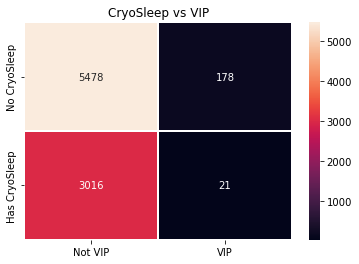

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset['CryoSleep'],dataset['VIP'])
sns.heatmap(cm,linewidths=1,annot=True,fmt='.0f').set(title='CryoSleep vs VIP',xticklabels=['Not VIP','VIP'], yticklabels=['No CryoSleep','Has CryoSleep']);


<strong><h3>We can infer from the heatmap above🕵️ that customers who purchased a VIP experience often declined to CryoSleep. This can be explained by the fact that they wanted to take it all in and experience it as being a VIP would be less important if they were frozen.</h3></strong>

# ------------------------------------------------------------------------------------------------------------

# Preparing Data to train models

### We need to normalizing/standardizing features

In [23]:
minmax = MinMaxScaler()
dataset[['RoomService', 'FoodCourt', 'Spa', 'VRDeck']] = minmax.fit_transform(dataset[['RoomService', 'FoodCourt', 'Spa', 'VRDeck']])

In [24]:
dataset

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,RoomService,FoodCourt,Spa,VRDeck,Transported
0,1,0,2,0,1,1,0.000000,0.000000,0.000000,0.000000,0
1,0,0,2,0,5,2,0.007608,0.000302,0.024500,0.001823,1
2,1,0,2,1,0,2,0.003001,0.119948,0.299670,0.002030,0
3,1,0,2,0,0,2,0.000000,0.043035,0.148563,0.007997,0
4,0,0,2,0,5,2,0.021149,0.002348,0.025214,0.000083,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,1,0,1,0.000000,0.228726,0.073322,0.003066,0
8689,0,1,1,0,6,2,0.000000,0.000000,0.000000,0.000000,0
8690,0,0,2,0,6,2,0.000000,0.000000,0.000045,0.000000,1
8691,1,0,0,0,4,2,0.000000,0.035186,0.015753,0.134049,0


<strong><h3>We can now see that all of our features have been normalised and that our data has been clean.</h3></strong>

<strong><h3>Consequently, we may state that our data is prepared for the model.💥💃💥💃💥.</h3></strong>

# -----------------------------------------------------------------------------------------------------------

<a id='model'></a>

<center><strong><h1 style="color:navy">Modeling</h1></strong></center>

<strong><p>As we already know, our issue is one of classification (supervised), hence the models I'll be using and contrasting are as follows:</p></strong>  

<ul style="color:gray">
    <li>Logistic Regression</li>
    <li>Random Forests</li>
    <li>KNeighbors</li>
    <li>GaussianNB</li>
    <li>Perceptron</li>
    <li>Naïve Bayes (Multinomial)</li>
    <li>SVM with linearkernel</li>
    <li>SVM with polynomial kernel</li>
</ul>    

<h3><center><font color=purple> 
    Seperate the label from our features to split our data to tran/test </font></center></h3>

In [25]:
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

<h3><center><font color=purple> 
    Seperate the label from our features to split our data to tran/test </font></center></h3>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<br>
<h1><center><font color=navy> 
    Training ML Models </font></center></h1>

<h3><font color=teal> 
    Logistic Regression </font></h3>

In [27]:
logreg = LogisticRegression(solver='lbfgs', max_iter=200) 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [28]:
pred_df= pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df

,Actual Value,Predicted Value
0,1,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
1734,0,0
1735,0,0
1736,1,1
1737,0,0


In [29]:
# accuracy on test data
lr_train = logreg.score(X_train,y_train)*100
lr_test = logreg.score(X_test,y_test)*100

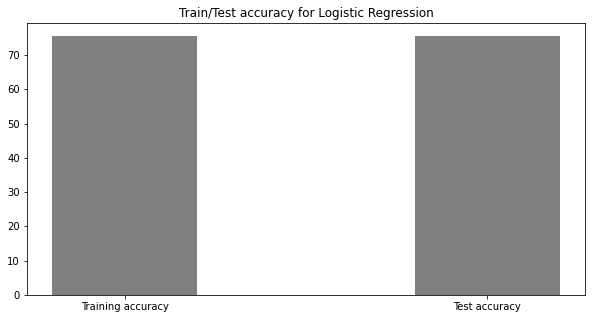

Train: 75.53925798101811
Test: 75.56066705002875


In [30]:
# creating the dataset
lr_data = {'Training accuracy':lr_train, 'Test accuracy':lr_test}
train_test = list(lr_data.keys())
values = list(lr_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
plt.title("Train/Test accuracy for Logistic Regression")
plt.show()
print("Train: " + str(lr_train))
print("Test: " + str(lr_test))

<strong><h3>Ummm🤔, As a result, the accuracy of the Logistic Regression model was 75.445%, which isn't great but also means that there isn't any overfitting. However, let's try a different technique.</h3></strong>

<h3><font color=teal> 
    KNeighborsClassifier</font></h3>

In [31]:
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train,y_train);

In [32]:
kn_train = knnClassifier.score(X_train,y_train)*100
kn_test = knnClassifier.score(X_test,y_test)*100

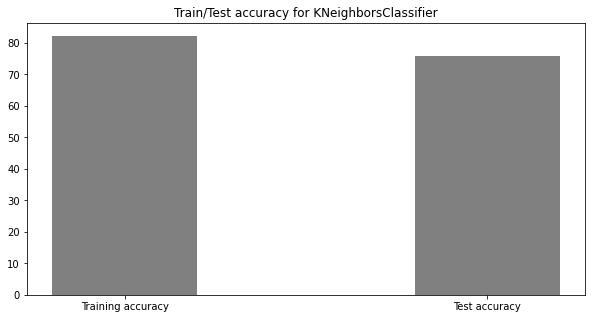

Train: 82.2260569456428
Test: 75.7906843013226


In [33]:
# creating the dataset
kn_data = {'Training accuracy':kn_train, 'Test accuracy':kn_test}
train_test = list(kn_data.keys())
values = list(kn_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for KNeighborsClassifier")
plt.show()
print("Train: " + str(kn_train))
print("Test: " + str(kn_test))

<strong><h3>Since KNNs are prone to overfitting, it is not entirely unexpected that the model performed better on the training set than it did on the test set. However, this can be tolerated because the accuracy gap between the two sets is not that wide. Keep trying; let's try a different algorithm🕵️.</h3></strong>

<h3><font color=teal> 
    Random Forests</font></h3>

[[651 212]
 [166 710]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.7826336975273146


0.7826336975273146

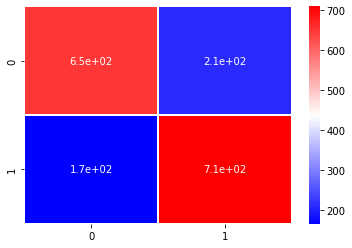

In [77]:
#Because we will fit this more than once, might as well make a function
def fit_random_forest_classifier(X_train, y_train):
    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
    print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc
    
fit_random_forest_classifier(X_train, y_train)

### Any thing along the diagonal is basically something where we predicted the same value that was actually true.

## Let's play with the parameters....

In [ ]:
randomfor = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0);
randomfor2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=717)
randomfor.fit(X_train,y_train);
randomfor2.fit(X_train,y_train);

In [35]:
# randomfor
rf1_train = randomfor.score(X_train,y_train)*100
rf1_test = randomfor.score(X_test,y_test)*100


# randomfor2
rf2_train = randomfor2.score(X_train,y_train)*100
rf2_test = randomfor2.score(X_test,y_test)*100

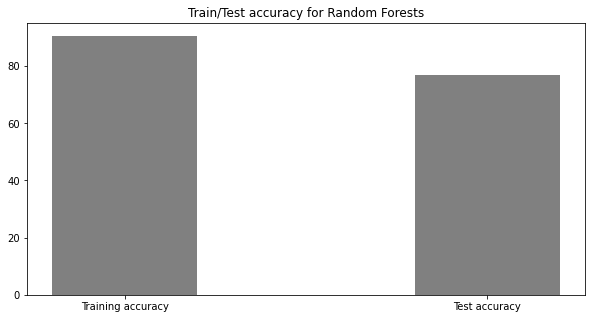

Train: 90.58096059821685
Test: 76.88326624496837


In [36]:
rf1_data = {'Training accuracy':rf1_train, 'Test accuracy':rf1_test}
train_test = list(rf1_data.keys())
values = list(rf1_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for Random Forests")
plt.show()
print("Train: " + str(rf1_train))
print("Test: " + str(rf1_test))

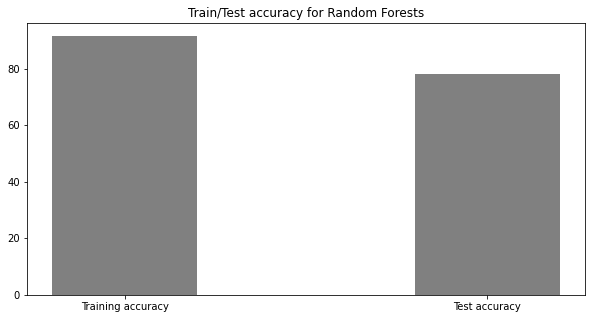

Train: 91.58757549611735
Test: 77.97584818861415


In [37]:
rf2_data = {'Training accuracy':rf2_train, 'Test accuracy':rf2_test}
train_test = list(rf2_data.keys())
values = list(rf2_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for Random Forests")
plt.show()
print("Train: " + str(rf2_train))
print("Test: " + str(rf2_test))

<h3><font color=purple> 
    ⚠️OVERFITTING⚠️</font></h3>
    
<br>

<strong><p>As can be seen, the model performs well on the training set but poorly on the test set, and there is a significant difference between the two. This indicates that the model overfits. Attempt another.</p></strong>

<h3><font color=teal> 
    GaussianNB</font></h3>

In [38]:
#training 
Guassian_Classifier = GaussianNB()
Guassian_Classifier.fit(X_train, y_train)
y_pred=Guassian_Classifier.predict(X_test)

In [39]:
gs_train = Guassian_Classifier.score(X_train,y_train)*100
gs_test = Guassian_Classifier.score(X_test,y_test)*100

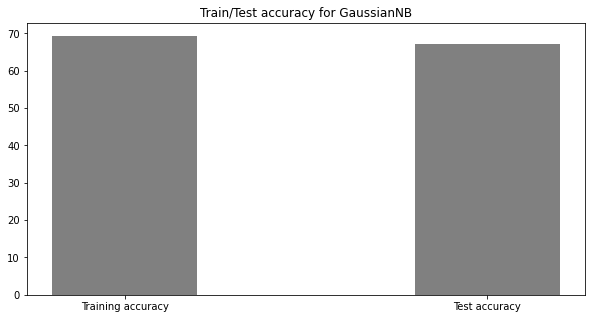

Train: 69.2982456140351
Test: 67.2225416906268


In [40]:
gs_data = {'Training accuracy':gs_train, 'Test accuracy':gs_test}
train_test = list(gs_data.keys())
values = list(gs_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for GaussianNB")
plt.show()
print("Train: " + str(gs_train))
print("Test: " + str(gs_test))

### Ummmm, Despite performing poorly, GaussianNB did neither underfit or overfit.

<h3><font color=teal> 
    Naïve Bayes (Multinomial)</font></h3>

In [41]:
#training 
MultinomialNB_Guassian_Classifier = MultinomialNB()
MultinomialNB_Guassian_Classifier.fit(X_train, y_train)
y_pred=MultinomialNB_Guassian_Classifier.predict(X_test)

In [42]:
nb_train = MultinomialNB_Guassian_Classifier.score(X_train,y_train)*100
nb_test = MultinomialNB_Guassian_Classifier.score(X_test,y_test)*100

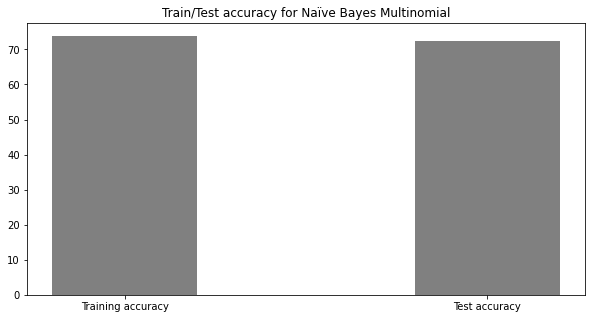

Train: 73.84239286741445
Test: 72.45543415756181


In [43]:
nb_data = {'Training accuracy':nb_train, 'Test accuracy':nb_test}
train_test = list(nb_data.keys())
values = list(nb_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for Naïve Bayes Multinomial")
plt.show()
print("Train: " + str(nb_train))
print("Test: " + str(nb_test))

<strong><p>Although Naive Bayes (Multinomial) did neither overfit or underfit, it did reach an accuracy of 72.4 percent. Moving to SVM.</p></strong>

<h3><font color=teal> 
    Support Vector Machines with linear kernel</font></h3>

In [44]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [45]:
sv_train = svc.score(X_train,y_train)*100
sv_test = svc.score(X_test,y_test)*100

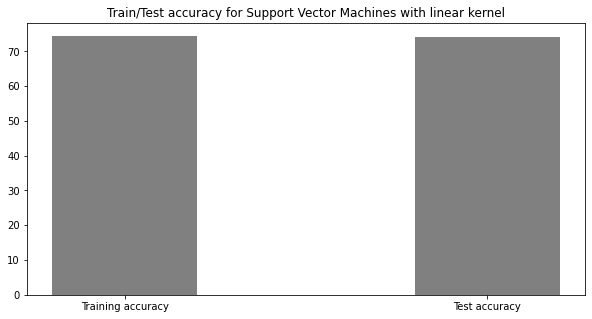

Train: 74.43198159332758
Test: 74.00805060379528


In [46]:
sv_data = {'Training accuracy':sv_train, 'Test accuracy':sv_test}
train_test = list(sv_data.keys())
values = list(sv_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for Support Vector Machines with linear kernel")
plt.show()
print("Train: " + str(sv_train))
print("Test: " + str(sv_test))

### Ummmm🤔, Close to Logistic Regression.

<h3><font color=teal> 
    Support Vector Machines with polynomial kernel</font></h3>

In [47]:
poly_svc=SVC(kernel='poly', degree=10, C=1.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)

In [48]:
svp_train = poly_svc.score(X_train,y_train)*100
svp_test = poly_svc.score(X_test,y_test)*100

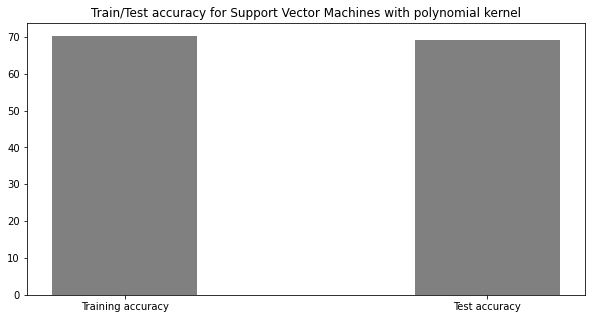

Train: 70.24733966062698
Test: 69.12018401380104


In [49]:
svp_data = {'Training accuracy':svp_train, 'Test accuracy':svp_test}
train_test = list(svp_data.keys())
values = list(svp_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for Support Vector Machines with polynomial kernel")
plt.show()
print("Train: " + str(svp_train))
print("Test: " + str(svp_test))

### On both the train and test sets, SVM with a polynomial kernel had poor accuracy.

<h3><font color=teal> 
    Perceptron</font></h3>

In [50]:
model = Perceptron()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv)
results = search.fit(X_train, y_train)

In [51]:
per_train = search.score(X_train,y_train)*100
per_test = search.score(X_test,y_test)*100

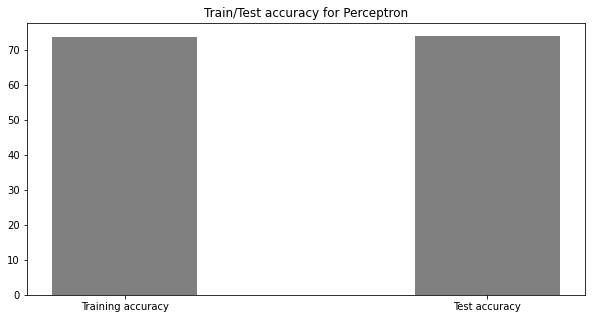

Train: 73.61230946218004
Test: 73.89304197814836


In [52]:
per_data = {'Training accuracy':per_train, 'Test accuracy':per_test}
train_test = list(per_data.keys())
values = list(per_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for Perceptron")
plt.show()
print("Train: " + str(per_train))
print("Test: " + str(per_test))

# ------------------------------------------------------------------------------------------------------------

<center><strong><h1 style="color:navy">Train accuracy for models</h1></strong></center>

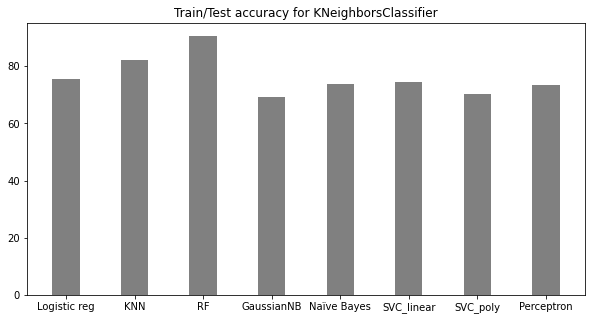

In [53]:
data = {'Logistic reg':lr_train, 'KNN':kn_train, "RF":rf1_train, "GaussianNB":gs_train, "Naïve Bayes":nb_train, 
        "SVC_linear":sv_train, "SVC_poly":svp_train, "Perceptron":per_train}
train_test = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for KNeighborsClassifier")
plt.show()

<center><h3>Execluding Random Forests because it overfits.</h3></center>

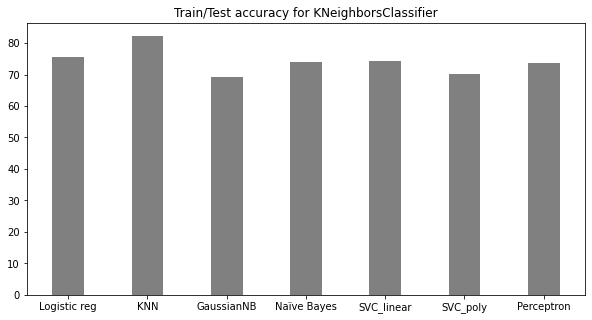

In [54]:
data = {'Logistic reg':lr_train, 'KNN':kn_train, "GaussianNB":gs_train, "Naïve Bayes":nb_train, 
        "SVC_linear":sv_train, "SVC_poly":svp_train, "Perceptron":per_train}
train_test = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for KNeighborsClassifier")
plt.show()

<center><strong><h1 style="color:navy">Test accuracy for models</h1></strong></center>

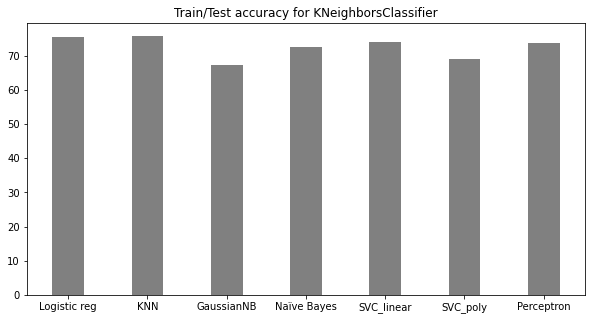

In [55]:
data = {'Logistic reg':lr_test, 'KNN':kn_test, "GaussianNB":gs_test, "Naïve Bayes":nb_test, 
        "SVC_linear":sv_test, "SVC_poly":svp_test, "Perceptron":per_test}
train_test = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train/Test accuracy for KNeighborsClassifier")
plt.show()

<center><strong><h3 style="color:teal"> I can determine that KNN is the winner by reaching an accuracy of 82.22605% on the training data and an accuracy of 75.79068% on the testing data from the above bar blots for Train/Test accuracy for the models that I have employed.</h3></strong></center>

<a id='hyper'></a>

<h1><center><font color=navy> 
    HyperParameters Tuning Phase</font></center></h1>

<h1><font color=teal> 
   KNN</font></h1>

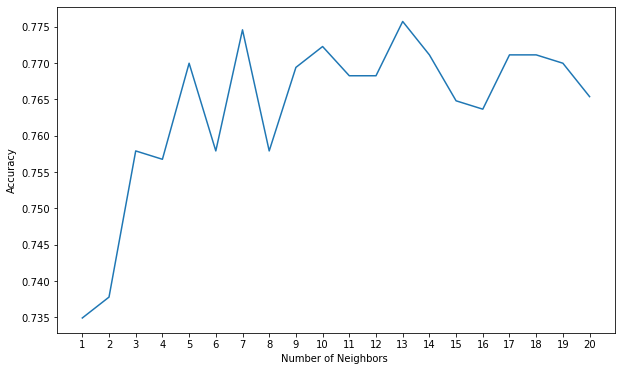

In [56]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

## Using GridSearch

In [57]:
grid_params = { 'n_neighbors' : [7,13,14],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [59]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_score_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


0.7654587287891861

In [60]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}

## This is the best score that we can achieve with KNN

# ---------------------------------------------------------------------------------------------------

<h1><font color=teal> 
   Random Forests</font></h1>

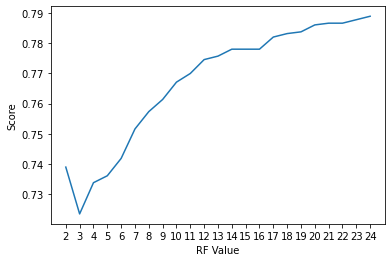

Random Forest Accuracy:  78.90%


In [61]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## Using GridSearchCV

In [62]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [63]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [64]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [65]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)

In [66]:
pred=rfc1.predict(X_test)
print("Accuracy on the training set is: " + str(rfc1.score(X_train,y_train)*100))
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred)*100)

Accuracy on the training set is: 81.43514524014955
Accuracy for Random Forest on CV data:  78.72340425531915


<strong><p> Therefore, what we did was utilise gridSearch to fine-tune the RandomForest parameters, and the result is the best parameters we can use, giving us the best accuracy without overfitting like we get in the base model.</p></strong>

<h1><font color=green> 
   SVM with differet C values</font></h1>

<h3 style="color:navy">Kernel = Linear</h3>

In [67]:
svc1 = SVC(kernel='linear', C=400)
svc1.fit(X_train,y_train)
y_pred=svc1.predict(X_test)
sv1_train = svc1.score(X_train,y_train)*100
sv1_test = svc1.score(X_test,y_test)*100

In [68]:
svc2 = SVC(kernel='linear', C=300.0)
svc2.fit(X_train,y_train)
y_pred=svc2.predict(X_test)
sv2_train = svc2.score(X_train,y_train)*100
sv2_test = svc2.score(X_test,y_test)*100

In [69]:
svc3 = SVC(kernel='linear', C=800.0)
svc3.fit(X_train,y_train)
y_pred=svc3.predict(X_test)
sv3_train = svc3.score(X_train,y_train)*100
sv3_test = svc3.score(X_test,y_test)*100

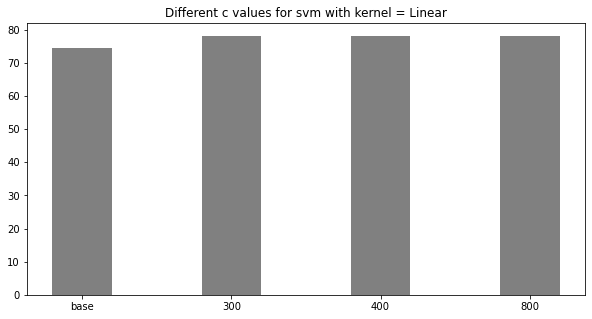

In [70]:
sv_tuning = {'base':sv_train, '300':sv2_train, "400":sv1_train, "800":sv3_train}
c_values = list(sv_tuning.keys())
values = list(sv_tuning.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(c_values, values, color ='gray',
        width = 0.4)
 
plt.title("Different c values for svm with kernel = Linear")
plt.show()

## As can be seen, the models with C = 400 and C = 300 are very similar and both have the best accuracy.

<h3 style="color:navy">Kernel = polynomial</h3>

In [71]:
svc_poly1 = SVC(kernel='poly', C=0.5)
svc_poly1.fit(X_train,y_train)
y_pred=svc_poly1.predict(X_test)
sv_poly1_train = svc_poly1.score(X_train,y_train)*100
sv_poly1_test = svc_poly1.score(X_test,y_test)*100

In [72]:
svc_poly2 = SVC(kernel='poly', C=100)
svc_poly2.fit(X_train,y_train)
y_pred=svc_poly2.predict(X_test)
sv_poly2_train = svc_poly2.score(X_train,y_train)*100
sv_poly2_test = svc_poly2.score(X_test,y_test)*100

In [73]:
svc_poly3 = SVC(kernel='poly', C=300)
svc_poly3.fit(X_train,y_train)
y_pred=svc_poly3.predict(X_test)
sv_poly3_train = svc_poly3.score(X_train,y_train)*100
sv_poly3_test = svc_poly3.score(X_test,y_test)*100

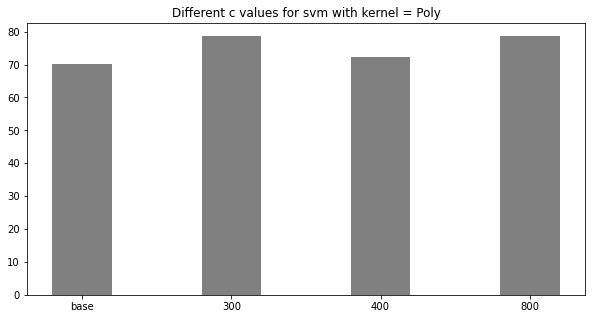

In [74]:
svp_tuning = {'base':svp_train, '300':sv_poly2_train, "400":sv_poly1_train, "800":sv_poly3_train}
c_values = list(svp_tuning.keys())
values = list(svp_tuning.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(c_values, values, color ='gray',
        width = 0.4)
 
plt.title("Different c values for svm with kernel = Poly")
plt.show()

## We can see that the model with C = 800 is the one that achieved the best accuracy.

<h1><center><font color=teal> 
    Final Results After Applying Hyperparameter Tuning</font></center></h1>

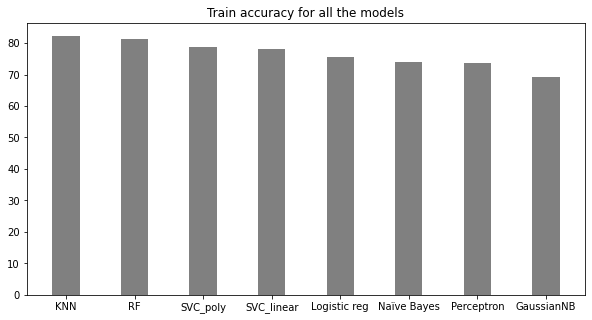

KNN: 82.2260569456428
RF: 81.43514524014955
SVC_poly: 78.68852459016394
SVC_linear: 78.09893586425079
Logistic Regression: 75.53925798101811
Naïve Bayes: 73.84239286741445
Perceptron: 73.61230946218004
GaussianNB: 69.2982456140351


In [97]:
data = { 'KNN':kn_train, "RF": rfc1.score(X_train,y_train)*100, "SVC_poly":sv_poly3_train, 
        "SVC_linear":sv2_train,'Logistic reg':lr_train, "Naïve Bayes":nb_train, 
          "Perceptron":per_train, "GaussianNB":gs_train,}
train_test = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Train accuracy for all the models")
plt.show()

print("KNN: " + str(kn_train))
print("RF: " + str(rfc1.score(X_train,y_train)*100))
print("SVC_poly: " + str(sv_poly3_train))
print("SVC_linear: " + str(sv2_train))
print("Logistic Regression: " + str(lr_train))
print("Naïve Bayes: " + str(nb_train))
print("Perceptron: " + str(per_train))
print("GaussianNB: " + str(gs_train))

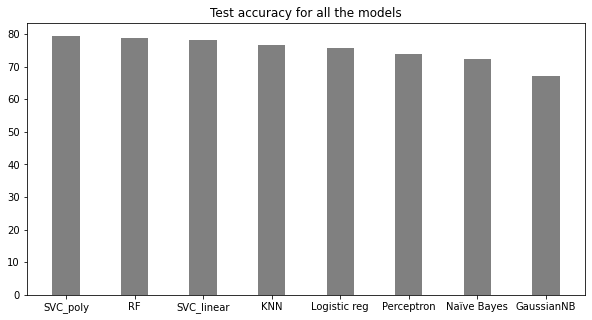

SVC_poly: 79.35595169637722
RF: 78.89591719378953
SVC_linear: 78.0333525014376
KNN: 76.5458728789186
Logistic Regression: 75.56066705002875
Naïve Bayes: 72.45543415756181
Perceptron: 73.89304197814836
GaussianNB: 67.2225416906268


In [96]:
data = {"SVC_poly":sv_poly3_test,"RF":RFAcc*100, "SVC_linear":sv2_test,'KNN':g_res.best_score_*100,
        'Logistic reg':lr_test, "Perceptron":per_test, "Naïve Bayes":nb_test, "GaussianNB":gs_test}  
         
train_test = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_test, values, color ='gray',
        width = 0.4)
 
plt.title("Test accuracy for all the models")
plt.show()

print("SVC_poly: " + str(sv_poly3_test))
print("RF: " + str(RFAcc*100))
print("SVC_linear: " + str(sv2_test))
print("KNN: " + str(g_res.best_score_*100))
print("Logistic Regression: " + str(lr_test))
print("Naïve Bayes: " + str(nb_test))
print("Perceptron: " + str(per_test))
print("GaussianNB: " + str(gs_test))

# -------------------------------------------------------------------------------------------------------------

<a id='res'></a>

<center><h1 style="color:teal"> After experimenting with various models🧪 and fine-tuning their parameters🎶, we can conclude that SVC with kerel = poly and C = 800 is the best model, with an accuracy of 79.355%, which is not exceptional but is good. KNN also achieved a good accuracy on the train data, with a precision of 82.226%, but it decreases on the test set, with a precision of 76.5458%🤔. I do believe, however, that there are some models that can achieve more</h1></center>

# -----------------------------------------------------------------------------------------------------------

<h1><center><font color=purple> 
    And that is it, This is the End of our story.</font></center></h1>
   

<h1><center><font color=purple> 
    Thank You😊 See you Soon, Bye👋</font></center></h1>
    
<h1><center><font color=purple> 
    See you Soon, Bye👋</font></center></h1>